In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from scipy.stats import pearsonr
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from datetime import datetime

In [4]:
data=pd.read_csv("train.csv",sep=",")
data["date"]=pd.to_datetime(data["date"],format="%Y-%m-%d %H:%M:%S")
data=data.set_index("date")
#data = data.asfreq('d')  Esto es para frecuencia diaria 
data = data.sort_index()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 244391 entries, 2018-01-01 00:00:00 to 2021-12-31 23:00:00
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   substation   244391 non-null  object 
 1   consumption  244391 non-null  float64
dtypes: float64(1), object(1)
memory usage: 5.6+ MB


In [6]:
subestacion1=data.query("substation=='AJAHUEL'")
y_train=subestacion1["consumption"].to_numpy()

In [7]:
puntos = [datetime.strptime("01-01-2019","%d-%m-%Y"),
        datetime.strptime("01-04-2019","%d-%m-%Y"),
        datetime.strptime("01-08-2019","%d-%m-%Y"),
        datetime.strptime("01-01-2020","%d-%m-%Y"),
        datetime.strptime("01-04-2020","%d-%m-%Y"),
        datetime.strptime("01-08-2020","%d-%m-%Y"),
        datetime.strptime("01-01-2020","%d-%m-%Y"),
        datetime.strptime("01-04-2021","%d-%m-%Y"),
        datetime.strptime("01-08-2021","%d-%m-%Y"),
        datetime.strptime("01-12-2021","%d-%m-%Y")]

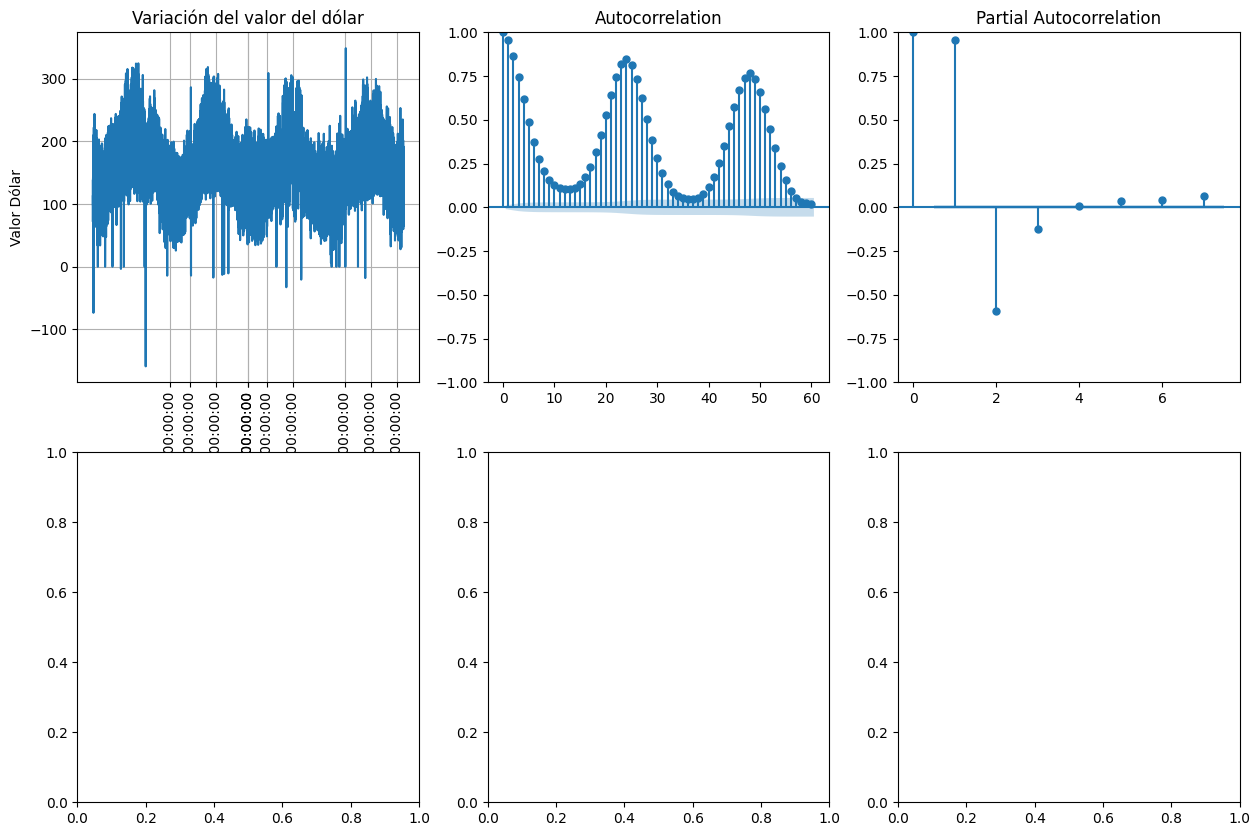

In [8]:
fig, axes=plt.subplots(2,3)
fig.set_size_inches(15,10)

axes[0][0].plot(subestacion1.index,y_train)
axes[0][0].set_xticks(puntos)
axes[0][0].set_xticklabels(list(map(str,puntos)),rotation=90)
axes[0][0].grid(True);
axes[0][0].set_xlabel("Fecha");
axes[0][0].set_ylabel("Valor Dólar");
axes[0][0].set_title("Variación del valor del dólar");
plot_acf(y_train,lags=60,ax=axes[0][1]);
plot_pacf(y_train,lags=7,ax=axes[0][2]);



In [9]:
data_test=pd.read_csv("test.csv",sep=",")
data_test["date"]=pd.to_datetime(data_test["date"],format="%Y-%m-%d %H:%M:%S")
data_test=data_test.set_index("date")
#data = data.asfreq('d')  Esto es para frecuencia diaria 
data_test = data_test.sort_index()

In [10]:
subestacion1_test=data_test.query("substation=='AJAHUEL'")
y_test=subestacion1_test["consumption"].to_numpy()

In [11]:
puntos = [datetime.strptime("01-01-2019","%d-%m-%Y"),
        datetime.strptime("01-04-2019","%d-%m-%Y"),
        datetime.strptime("01-08-2019","%d-%m-%Y"),
        datetime.strptime("01-01-2020","%d-%m-%Y"),
        datetime.strptime("01-04-2020","%d-%m-%Y"),
        datetime.strptime("01-08-2020","%d-%m-%Y"),
        datetime.strptime("01-01-2020","%d-%m-%Y"),
        datetime.strptime("01-04-2021","%d-%m-%Y"),
        datetime.strptime("01-08-2021","%d-%m-%Y"),
        datetime.strptime("01-12-2021","%d-%m-%Y"),
        datetime.strptime("01-04-2022","%d-%m-%Y"),
        datetime.strptime("01-08-2022","%d-%m-%Y"),
        datetime.strptime("01-12-2022","%d-%m-%Y")]

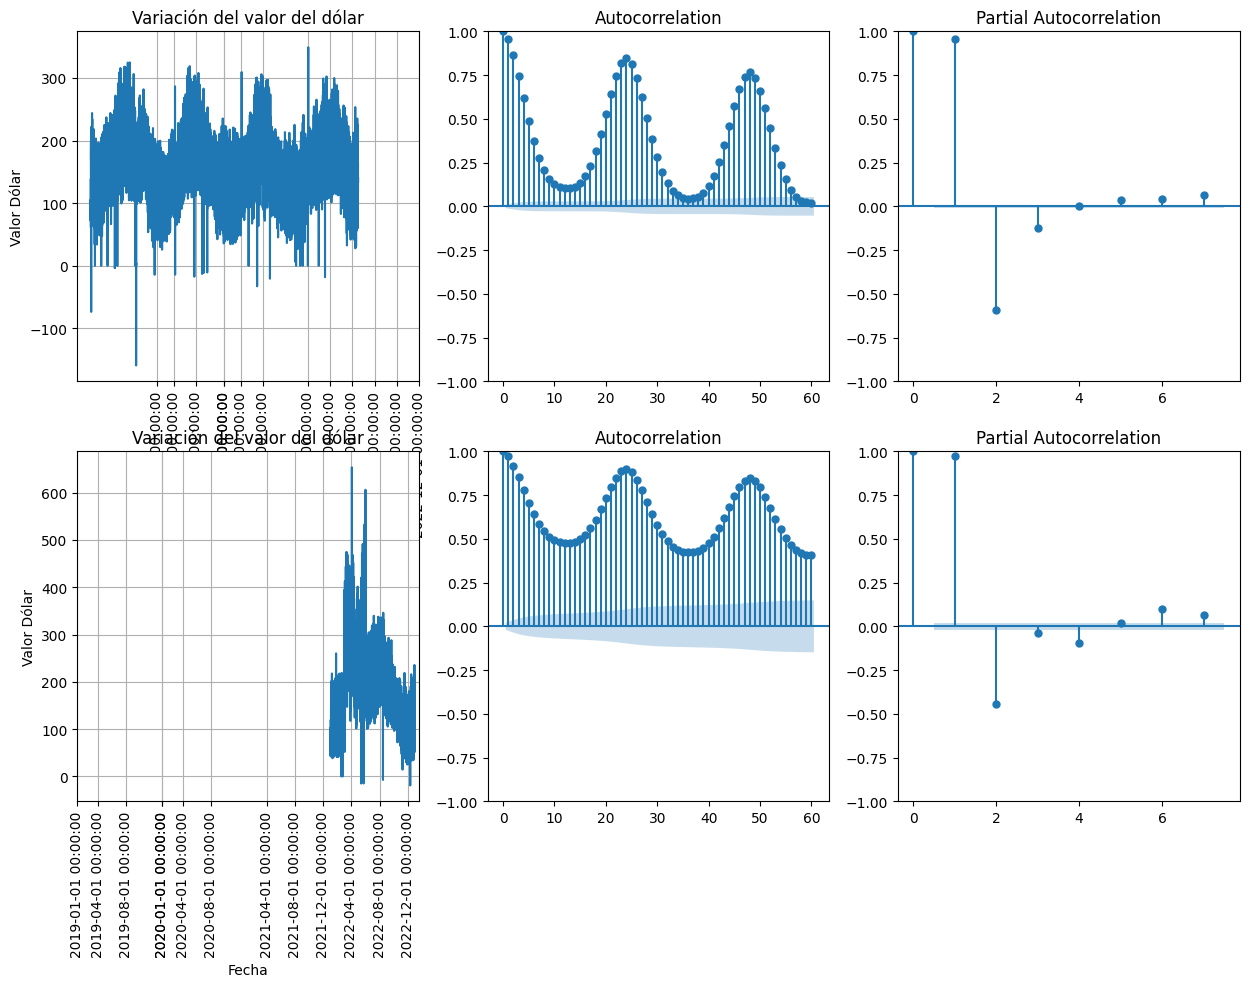

In [12]:
fig, axes=plt.subplots(2,3)
fig.set_size_inches(15,10)

axes[0][0].plot(subestacion1.index,y_train)
axes[0][0].set_xticks(puntos)
axes[0][0].set_xticklabels(list(map(str,puntos)),rotation=90)
axes[0][0].grid(True);
axes[0][0].set_xlabel("Fecha");
axes[0][0].set_ylabel("Valor Dólar");
axes[0][0].set_title("Variación del valor del dólar");
plot_acf(y_train,lags=60,ax=axes[0][1]);
plot_pacf(y_train,lags=7,ax=axes[0][2]);

axes[1][0].plot(subestacion1_test.index,y_test)
axes[1][0].set_xticks(puntos)
axes[1][0].set_xticklabels(list(map(str,puntos)),rotation=90)
axes[1][0].grid(True);
axes[1][0].set_xlabel("Fecha");
axes[1][0].set_ylabel("Valor Dólar");
axes[1][0].set_title("Variación del valor del dólar");
plot_acf(y_test,lags=60,ax=axes[1][1]);
plot_pacf(y_test,lags=7,ax=axes[1][2]);

In [13]:
x_train_w=[]
y_train_w=[]
window=20 #Se define en base a la observacion de los graficos de autocorrelacion de los datos de test
for i in range(0,len(y_train)):
    if i+window < len(y_train):
        row=[]
        for j in range(window):
            row.append(y_train[i+j])
        x_train_w.append(row)
        y_train_w.append(y_train[i+window])
    else:
        break
print(len(x_train_w),len(y_train_w))

34893 34893


In [14]:
x_test_w=[]
y_test_w=[]
window=20 #Debe ser identica a la venta de entrenamiento
for i in range(0,len(y_test)):
    if i+window < len(y_test):
        row=[]
        for j in range(window):
            row.append(y_test[i+j])
        x_test_w.append(row)
        y_test_w.append(y_test[i+window])
    else:
        break
print(len(x_test_w),len(y_test_w))

8739 8739


In [15]:
x_test_w=np.asarray(x_test_w)
x_train_w=np.asarray(x_train_w)
y_test_w=np.asarray(y_test_w)
y_train_w=np.asarray(y_train_w)

In [16]:
from keras.models import Sequential
import numpy as np
from keras.utils import pad_sequences
from sklearn.model_selection import train_test_split
from keras.layers import SimpleRNN, Dense, Input, LSTM, GRU
from keras.optimizers import Adam
import pandas as pd
import tensorflow as tf
import random as rd

In [18]:
x_train_w_s=x_train_w.reshape(-1,20,1)
print(x_train_w_s.shape)

(34893, 20, 1)


In [19]:
x_test_w_s=x_test_w.reshape(-1,20,1)
print(x_test_w_s.shape)

(8739, 20, 1)


In [20]:
model = Sequential()
model.add(Input(name="serie",shape=(20,1)))
model.add(LSTM(512))
model.add(Dense(128))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 512)            │     1,052,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,118,465 (4.27 MB)

 Trainable params: 1,118,465 (4.27 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
tag="rnn"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model.compile(optimizer="Adam", loss='mse', metrics=['mse','mae'])
rnn = model.fit(x_train_w_s, y_train_w, validation_data=(x_test_w_s,y_test_w), batch_size=64, epochs=32,verbose=1,shuffle=True,callbacks=[tensorboard_callback])
model.save(log_dir+'/model_{0}.keras'.format(tag))
y_test_w_s_pred=model.predict(x_test_w_s)

Epoch 1/32
546/546 ━━━━━━━━━━━━━━━━━━━━ 32s 56ms/step - loss: 1015.6678 - mae: 14.1551 - mse: 1015.6678 - val_loss: 1310.7269 - val_mae: 16.5693 - val_mse: 1310.7269
Epoch 2/32
546/546 ━━━━━━━━━━━━━━━━━━━━ 31s 56ms/step - loss: 105.1605 - mae: 6.2056 - mse: 105.1605 - val_loss: 1144.0850 - val_mae: 15.0205 - val_mse: 1144.0850
Epoch 3/32
546/546 ━━━━━━━━━━━━━━━━━━━━ 30s 56ms/step - loss: 100.0606 - mae: 6.0903 - mse: 100.0606 - val_loss: 979.8460 - val_mae: 13.9674 - val_mse: 979.8460
Epoch 4/32
546/546 ━━━━━━━━━━━━━━━━━━━━ 31s 57ms/step - loss: 95.4615 - mae: 5.9092 - mse: 95.4615 - val_loss: 1027.5665 - val_mae: 14.0455 - val_mse: 1027.5665
Epoch 5/32
546/546 ━━━━━━━━━━━━━━━━━━━━ 33s 61ms/step - loss: 94.4597 - mae: 5.9201 - mse: 94.4597 - val_loss: 976.7317 - val_mae: 14.2174 - val_mse: 976.7317
Epoch 6/32
546/546 ━━━━━━━━━━━━━━━━━━━━ 35s 64ms/step - loss: 93.3282 - mae: 5.8720 - mse: 93.3282 - val_loss: 1205.5028 - val_mae: 15.5936 - val_mse: 1205.5028
Epoch 7/32
546/546 ━━━━━━━━━━

FileNotFoundError: [Errno 2] No such file or directory: 'logs/fit/rnn20250830-142858/model_rnn20250830-142858.keras'

In [23]:
model.save('model_{0}.keras'.format(tag))
y_test_w_s_pred=model.predict(x_test_w_s)

274/274 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


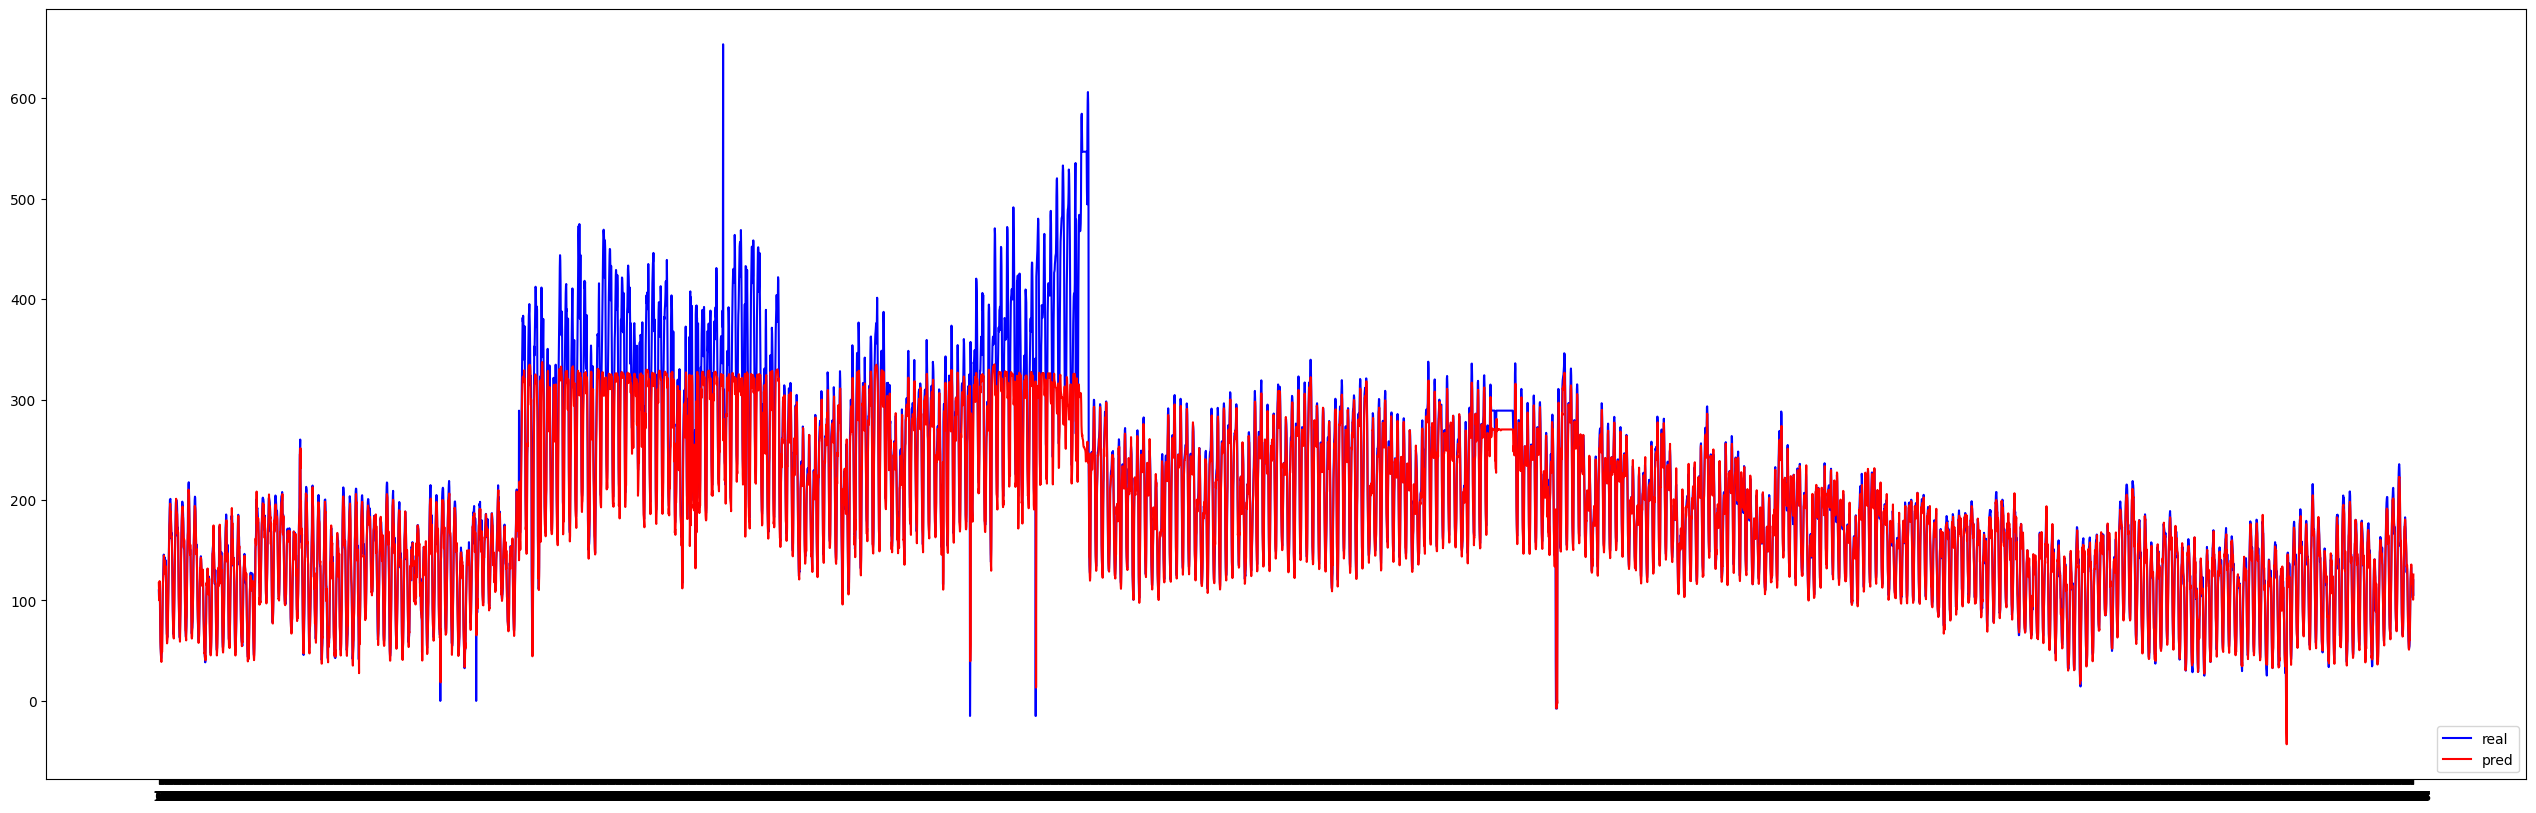

In [24]:
fig = plt.figure()
fig.set_size_inches(32,10)
ax1 = fig.add_subplot(111)
eje=np.arange(0, len(x_test_w), 1.0)
plt.xticks(eje)

ax1.plot(eje, y_test_w, c='b', label='real')
ax1.plot(eje, y_test_w_s_pred, c='r', label='pred')
plt.legend(loc='lower right')
plt.show()